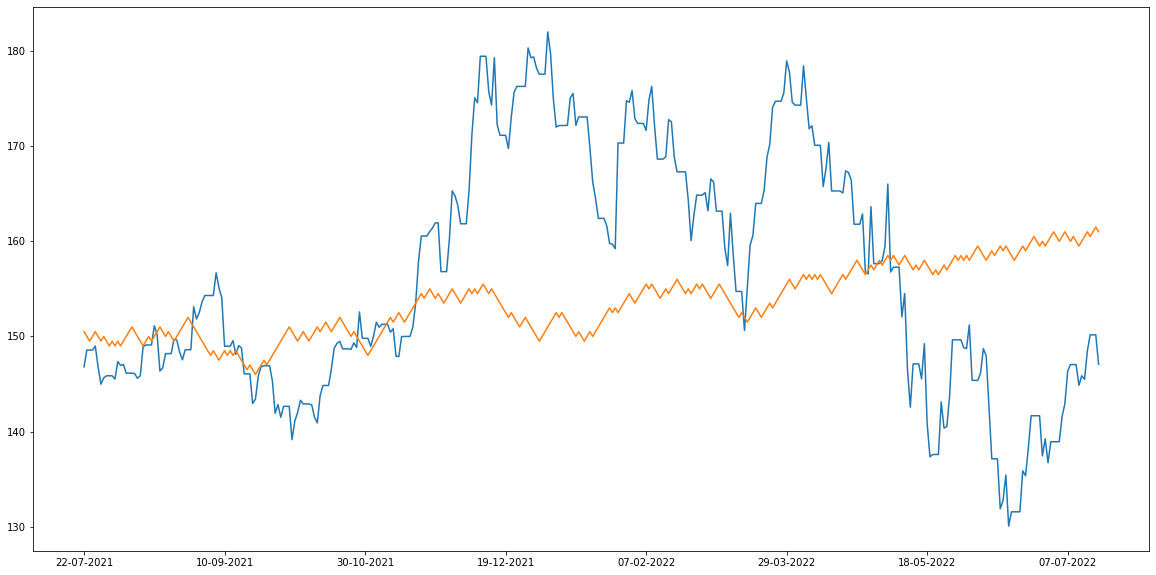

In [2]:
#Random Walk

import csv
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

final_price = []

for _ in range(25):
    price = 150
    daily_price = []
    for _ in range(362):
        daily_outcome = 0
        coin = np.random.randint(0,2)
        if coin == 0:
            daily_outcome += 0.5
        else:
            daily_outcome -= 0.5
        price = price + daily_outcome
        daily_price.append(price)

    final_price.append(price)

s = sum(final_price)/25             


# Dados históricos/ reais

with open("APL.csv", "r") as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=";")

    data_real=[]
    prices=[]

    for line in csv_reader:             
        data_real.append(line["Date"])
        prices.append(line["Close"])

start = datetime.datetime.strptime("22-07-2021", "%d-%m-%Y")
end = datetime.datetime.strptime("18-07-2022", "%d-%m-%Y")
date_generated = pd.date_range(start, end)

data_gerada = list(date_generated.strftime("%d-%m-%Y"))

final_prices = []

j = 0
for i in range(len(data_gerada)):
    if data_real[j] != data_gerada[i]:
        final_prices.append(prices[j - 1])
    else:
        final_prices.append(prices[j])
        j = j + 1


#Representação Gráfica
    
    
plt.rcParams["figure.figsize"] = (20,10)

y = list(map(float, [price.replace(",", ".") for price in final_prices]))


xpoints = np.array(data_gerada)
ypoints = np.array(y)
y2points = np.array(daily_price)


plt.xticks(np.linspace(0,600,13))
plt.plot(xpoints, ypoints)
plt.plot(xpoints, y2points)

plt.show()